In [30]:
# # perform this in colab first:
# !git clone https://github.com/kyleoneil/MLProjs.git
# import os
# os.chdir('MLProjs')
# print('we are currently at:', os.getcwd())

# load dataset

In [43]:
# !git clone https://github.com/inoueMashuu/hiragana-dataset.git
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from tensorflow.keras import layers
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
import  tensorflow.keras.models as models
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, \
    confusion_matrix, classification_report, ConfusionMatrixDisplay

In [32]:
import re
import os
import numpy as np
import pandas as pd

dtable = np.array(os.listdir('hiragana-dataset/hiragana_images'))
dtable = dtable.reshape(50,20).transpose()
pattern = re.compile(r'kana([A-Z]+)')
syllables = [pattern.search(f).group(1) for f in dtable[0]]

display (pd.DataFrame(dtable, columns=syllables))

,A,BA,CHI,DA,E,FU,HA,HE,HI,HO,...,TA,TE,TO,TSU,U,WA,WO,YA,YO,YU
0,kanaA0.jpg,kanaBA0.jpg,kanaCHI0.jpg,kanaDA0.jpg,kanaE0.jpg,kanaFU0.jpg,kanaHA0.jpg,kanaHE0.jpg,kanaHI0.jpg,kanaHO0.jpg,...,kanaTA0.jpg,kanaTE0.jpg,kanaTO0.jpg,kanaTSU0.jpg,kanaU0.jpg,kanaWA0.jpg,kanaWO0.jpg,kanaYA0.jpg,kanaYO0.jpg,kanaYU0.jpg
1,kanaA1.jpg,kanaBA1.jpg,kanaCHI1.jpg,kanaDA1.jpg,kanaE1.jpg,kanaFU1.jpg,kanaHA1.jpg,kanaHE1.jpg,kanaHI1.jpg,kanaHO1.jpg,...,kanaTA1.jpg,kanaTE1.jpg,kanaTO1.jpg,kanaTSU1.jpg,kanaU1.jpg,kanaWA1.jpg,kanaWO1.jpg,kanaYA1.jpg,kanaYO1.jpg,kanaYU1.jpg
2,kanaA10.jpg,kanaBA10.jpg,kanaCHI10.jpg,kanaDA10.jpg,kanaE10.jpg,kanaFU10.jpg,kanaHA10.jpg,kanaHE10.jpg,kanaHI10.jpg,kanaHO10.jpg,...,kanaTA10.jpg,kanaTE10.jpg,kanaTO10.jpg,kanaTSU10.jpg,kanaU10.jpg,kanaWA10.jpg,kanaWO10.jpg,kanaYA10.jpg,kanaYO10.jpg,kanaYU10.jpg
3,kanaA11.jpg,kanaBA11.jpg,kanaCHI11.jpg,kanaDA11.jpg,kanaE11.jpg,kanaFU11.jpg,kanaHA11.jpg,kanaHE11.jpg,kanaHI11.jpg,kanaHO11.jpg,...,kanaTA11.jpg,kanaTE11.jpg,kanaTO11.jpg,kanaTSU11.jpg,kanaU11.jpg,kanaWA11.jpg,kanaWO11.jpg,kanaYA11.jpg,kanaYO11.jpg,kanaYU11.jpg
4,kanaA12.jpg,kanaBA12.jpg,kanaCHI12.jpg,kanaDA12.jpg,kanaE12.jpg,kanaFU12.jpg,kanaHA12.jpg,kanaHE12.jpg,kanaHI12.jpg,kanaHO12.jpg,...,kanaTA12.jpg,kanaTE12.jpg,kanaTO12.jpg,kanaTSU12.jpg,kanaU12.jpg,kanaWA12.jpg,kanaWO12.jpg,kanaYA12.jpg,kanaYO12.jpg,kanaYU12.jpg
5,kanaA13.jpg,kanaBA13.jpg,kanaCHI13.jpg,kanaDA13.jpg,kanaE13.jpg,kanaFU13.jpg,kanaHA13.jpg,kanaHE13.jpg,kanaHI13.jpg,kanaHO13.jpg,...,kanaTA13.jpg,kanaTE13.jpg,kanaTO13.jpg,kanaTSU13.jpg,kanaU13.jpg,kanaWA13.jpg,kanaWO13.jpg,kanaYA13.jpg,kanaYO13.jpg,kanaYU13.jpg
6,kanaA14.jpg,kanaBA14.jpg,kanaCHI14.jpg,kanaDA14.jpg,kanaE14.jpg,kanaFU14.jpg,kanaHA14.jpg,kanaHE14.jpg,kanaHI14.jpg,kanaHO14.jpg,...,kanaTA14.jpg,kanaTE14.jpg,kanaTO14.jpg,kanaTSU14.jpg,kanaU14.jpg,kanaWA14.jpg,kanaWO14.jpg,kanaYA14.jpg,kanaYO14.jpg,kanaYU14.jpg
7,kanaA15.jpg,kanaBA15.jpg,kanaCHI15.jpg,kanaDA15.jpg,kanaE15.jpg,kanaFU15.jpg,kanaHA15.jpg,kanaHE15.jpg,kanaHI15.jpg,kanaHO15.jpg,...,kanaTA15.jpg,kanaTE15.jpg,kanaTO15.jpg,kanaTSU15.jpg,kanaU15.jpg,kanaWA15.jpg,kanaWO15.jpg,kanaYA15.jpg,kanaYO15.jpg,kanaYU15.jpg
8,kanaA16.jpg,kanaBA16.jpg,kanaCHI16.jpg,kanaDA16.jpg,kanaE16.jpg,kanaFU16.jpg,kanaHA16.jpg,kanaHE16.jpg,kanaHI16.jpg,kanaHO16.jpg,...,kanaTA16.jpg,kanaTE16.jpg,kanaTO16.jpg,kanaTSU16.jpg,kanaU16.jpg,kanaWA16.jpg,kanaWO16.jpg,kanaYA16.jpg,kanaYO16.jpg,kanaYU16.jpg
9,kanaA17.jpg,kanaBA17.jpg,kanaCHI17.jpg,kanaDA17.jpg,kanaE17.jpg,kanaFU17.jpg,kanaHA17.jpg,kanaHE17.jpg,kanaHI17.jpg,kanaHO17.jpg,...,kanaTA17.jpg,kanaTE17.jpg,kanaTO17.jpg,kanaTSU17.jpg,kanaU17.jpg,kanaWA17.jpg,kanaWO17.jpg,kanaYA17.jpg,kanaYO17.jpg,kanaYU17.jpg


In [33]:
import csv

# Define the kana characters and their corresponding labels
kana_characters = [
    'A', 'I', 'U', 'E', 'O', 'MA', 'MI', 'MU', 'ME', 'MO',
    'KA', 'KI', 'KU', 'KE', 'KO', 'SA', 'SHI', 'SU', 'SE', 'SO',
    'YA', 'YU', 'YO', 'WA', 'WO', 'TA', 'CHI', 'TSU', 'TE', 'TO',
    'NA', 'NI', 'NU', 'NE', 'NO', 'HA', 'HI', 'FU', 'HE', 'HO',
    'RA', 'RI', 'RU', 'RE', 'RO', 'N', 'DA', 'JI', 'BA', 'PI'
]

# Initialize variables
image_data = []
k = 0

# Loop through each kana character and generate image names and labels
for kana in kana_characters:
    for i in range(20):
        image_name = f'hiragana-dataset/hiragana_images/kana{kana}{i}.jpg'
        label = kana
        image_data.append([image_name, label])
    k += 1

# Write the data to a CSV file
csv_file = 'hiragana_dataset2.csv'
with open(csv_file, 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(['ImageName', 'Label'])  # Write header
    csvwriter.writerows(image_data)

print(f'Data successfully written to {csv_file}')

cv = pd.read_csv(csv_file)
cv.head(100)

Data successfully written to hiragana_dataset2.csv


,ImageName,Label
0,hiragana-dataset/hiragana_images/kanaA0.jpg,A
1,hiragana-dataset/hiragana_images/kanaA1.jpg,A
2,hiragana-dataset/hiragana_images/kanaA2.jpg,A
3,hiragana-dataset/hiragana_images/kanaA3.jpg,A
4,hiragana-dataset/hiragana_images/kanaA4.jpg,A
...,...,...
95,hiragana-dataset/hiragana_images/kanaO15.jpg,O
96,hiragana-dataset/hiragana_images/kanaO16.jpg,O
97,hiragana-dataset/hiragana_images/kanaO17.jpg,O
98,hiragana-dataset/hiragana_images/kanaO18.jpg,O


In [34]:
from PIL import Image
img_width, img_height = 32, 32

# Load images and labels
images = []
labels = []
for index, row in cv.iterrows():
    img = Image.open(row['ImageName']).convert('L')  # convert image to grayscale
    img = img.resize((img_width, img_height))
    img_array = np.array(img)
    images.append(img_array)
    label = row['Label']
    if pd.isna(label) or label == 'NA':
        label = 'NA'
    labels.append(label)
images = np.array(images)
labels = np.array(labels)

images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

999


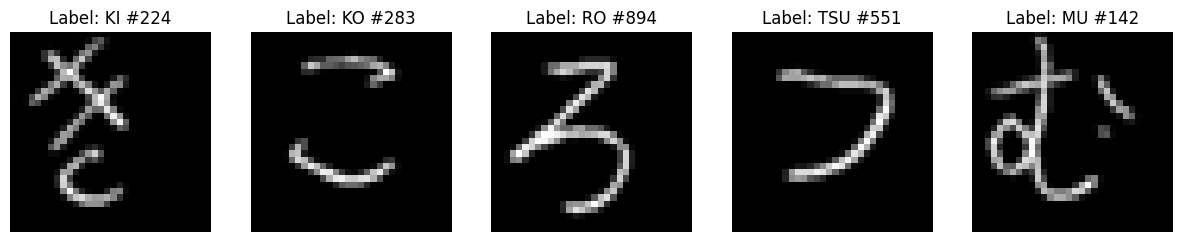

In [35]:
import matplotlib.pyplot as plt
import random

dataset_len = len(labels) - 1
print(dataset_len)
fig, axs = plt.subplots(1,5, figsize=(15,3))
axs = axs.flatten()

for i in range(5):
    ran = random.randint(0, dataset_len)
    ax = axs[i]
    ax.imshow(images[ran].reshape(img_width, img_height), cmap='gray')
    ax.set_title("Label: " + labels[ran] + f' #{ran}')
    ax.axis('off')

In [36]:
flat_images = images.reshape((images.shape[0], -1))

# Create column names for the pixel values
pixel_columns = [f'pixel_{i+1}' for i in range(flat_images.shape[1])]

# Create the DataFrame
df = pd.DataFrame(flat_images, columns=pixel_columns)
df['label'] = labels


label_encoder = LabelEncoder()
y_numeric = label_encoder.fit_transform(df['label'])


# Display the DataFrame
df.head()

,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,pixel_10,...,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023,pixel_1024,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,A


In [37]:


# Separate features and labels
X = df[pixel_columns].values
y = y_numeric

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Convert to one-hot encoding
# Reshape the data back to 2D images
X_train = X_train.reshape((-1, img_width, img_height, 1))
X_test = X_test.reshape((-1, img_width, img_height, 1))

# Convert labels to one-hot encoding
y_train_cnn = tf.keras.utils.to_categorical(y_train)
y_test_cnn = tf.keras.utils.to_categorical(y_test)



In [39]:
# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(np.unique(y)), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train_cnn, epochs=10, validation_data=(X_test, y_test_cnn))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test_cnn, verbose=2)
print(f'Test accuracy: {test_acc}')

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.0431 - loss: 5.9709 - val_accuracy: 0.1650 - val_loss: 3.3876
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2182 - loss: 2.8919 - val_accuracy: 0.4150 - val_loss: 2.1750
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5785 - loss: 1.5594 - val_accuracy: 0.6000 - val_loss: 1.3786
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8144 - loss: 0.6705 - val_accuracy: 0.7600 - val_loss: 0.8808
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9340 - loss: 0.2911 - val_accuracy: 0.7950 - val_loss: 0.8791
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9619 - loss: 0.1186 - val_accuracy: 0.8300 - val_loss: 0.6007
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9847 - loss: 0.0625 - val_accuracy: 0.8300 - val_loss: 0.5730
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9845 - loss: 0.0978 - val_accuracy: 0.8600 - val_loss:

#### SVM

In [44]:
# Flatten the image data
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Define the scaler and the SVR model
scaler = StandardScaler()
svm = SVC(kernel='rbf')

# Create a pipeline
pipeline = Pipeline([
    ('scaler', scaler),
    ('svm', svm)
])

# Define the hyperparameters to tune
param_grid = {
    'svc__C': [0.1, 1, 10, 100],
    'svc__gamma': ['scale', 'auto', 0.1, 0.01]
}

In [45]:
# Grid Search
grid_search_svm = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_svm.fit(X_train_flat, y_train)
model_svm = grid_search_svm.best_estimator_
svm_predictions = grid_search_svm.predict(X_test_flat)
accuracy = accuracy_score(y_test, svm_predictions)
precision = precision_score(y_test, svm_predictions)
recall = recall_score(y_test, svm_predictions)
f1 = f1_score(y_test, svm_predictions)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

report = classification_report(y_test, svm_predictions)
ConfusionMatrixDisplay.from_predictions(y_test, svm_predictions)
print("Classification Report:\n", report)

ValueError: Invalid parameter 'epsilon' for estimator SVC(C=0.1). Valid parameters are: ['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'].